In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#%matplotlib inline

In [2]:
data = pd.read_csv("Loan_Data/train.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [4]:
#Pandas profiling is an open source Python module with which we can quickly
#do an exploratory data analysis with just a few lines of code.
#import pandas_profiling
#pandas_profiling.ProfileReport(data)

In [14]:
from pandas_profiling import ProfileReport
prof = ProfileReport(data)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [15]:
pandas_profiling.version.__version__

'3.1.0'

In [5]:
data.shape

(614, 13)

In [6]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [7]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
num_col = data.describe().columns
num_col

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

<AxesSubplot:xlabel='Loan_Status', ylabel='count'>

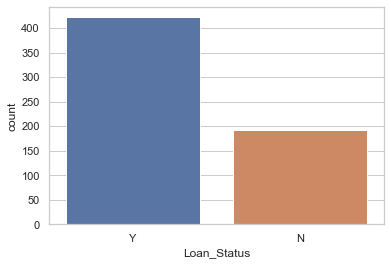

In [62]:
import seaborn as sns
sns.set_theme(style="whitegrid")
plt.figure(figsize=(6,4))
sns.countplot(data=data,x="Loan_Status")

In [25]:
data.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [31]:
data.Loan_Status.value_counts()/data.shape[0]*100

Y    68.729642
N    31.270358
Name: Loan_Status, dtype: float64

In [19]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<AxesSubplot:xlabel='variable', ylabel='value'>

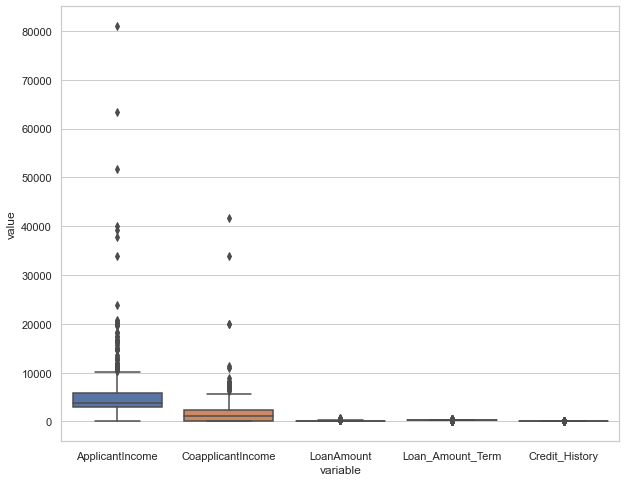

In [52]:
plt.figure(figsize=(10,8))
sns.boxplot(x="variable",y="value",data=pd.melt(data[num_col]))

<AxesSubplot:xlabel='variable', ylabel='value'>

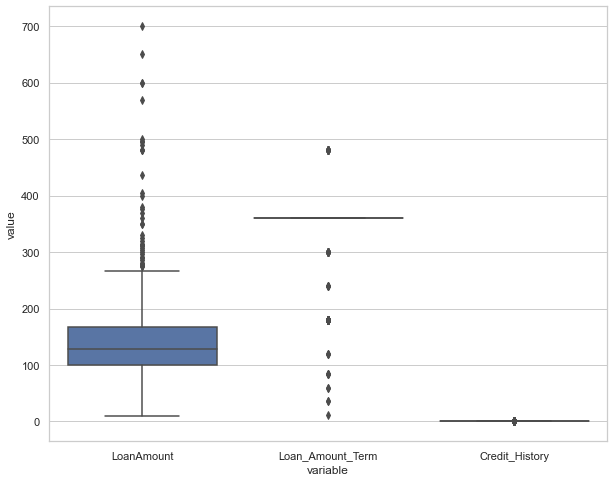

In [59]:
a = ['LoanAmount','Loan_Amount_Term','Credit_History']
plt.figure(figsize=(10,8))
sns.boxplot(x="variable",y="value",data=pd.melt(data[a]))

# Data handling for missing values and outliers
* Our dataset is very small (~700 entries) with a lot of outliers and missing values.  
* We cannot afford to lose data further by removing the missing value and outliers.

In [66]:
# data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
# data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
# data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())


In [65]:
a = ['LoanAmount','Loan_Amount_Term','Credit_History']
for col in a:
    data[col] = data[col].fillna(data[col].mean())

In [69]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term      0
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

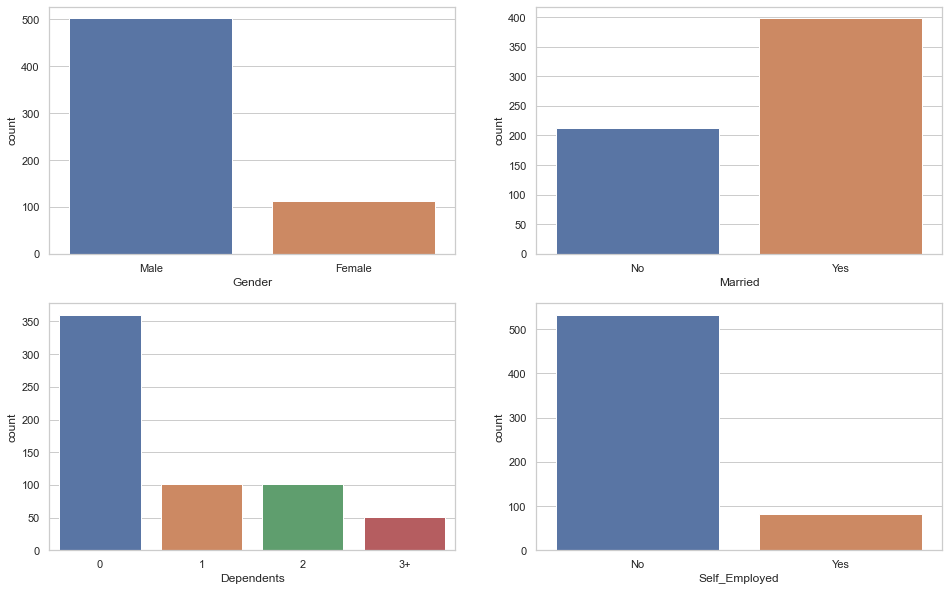

In [109]:
fig, ax = plt.subplots(2, 2,figsize=(16,10))
sns.countplot(data=data,x="Gender",ax=ax[0,0])
sns.countplot(data=data,x="Married",ax=ax[0,1])
sns.countplot(data=data,x="Dependents",ax=ax[1,0])
sns.countplot(data=data,x="Self_Employed", ax=ax[1,1])
plt.show()

# Handle categorical missing values

In [110]:
c=['Gender','Married','Dependents','Self_Employed']
for col in c:
    data[col] = data[col].fillna(data[col].mode()[0])

In [111]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

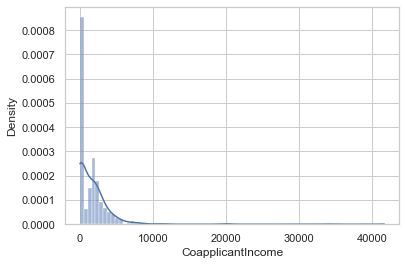

In [142]:
#check the data distribution for numerical components
sns.histplot(data=data ,x="CoapplicantIncome", kde=True, stat='density')

C:\Users\Kuber Kumar\AppData\Roaming\Python\Python37\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

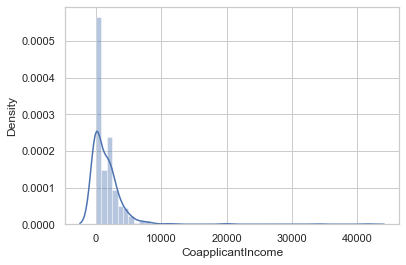

In [143]:
sns.distplot(data.CoapplicantIncome, kde=True)

<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

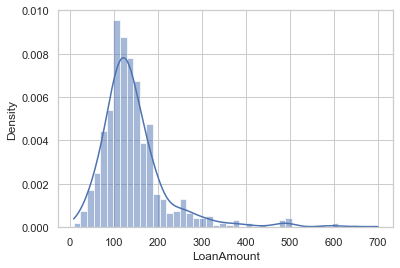

In [144]:
sns.histplot(data=data ,x="LoanAmount", kde=True, stat='density')

<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

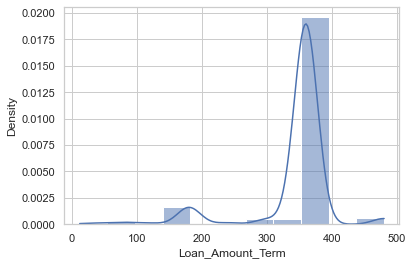

In [222]:
sns.histplot(data=data ,x="Loan_Amount_Term", kde=True, stat='density')

In [223]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,ApplicantIncome_log,LoanAmount_log,Total_Income_log,CoapplicantIncome_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,5849.0,8.674026,4.986426,8.674026,-inf
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,6091.0,8.430109,4.852030,8.714568,7.318540
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,3000.0,8.006368,4.189655,8.006368,-inf
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4941.0,7.856707,4.787492,8.505323,7.765569
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,6000.0,8.699515,4.948760,8.699515,-inf


In [224]:
data['Total_Income'] = data["ApplicantIncome"] +data["CoapplicantIncome"]

In [225]:
data["ApplicantIncome_log"] = np.log(data["ApplicantIncome"])
data["LoanAmount_log"] = np.log(data["LoanAmount"])
data["Total_Income_log"] =np.log(data["Total_Income"])

In [226]:
data["Total_Income_log"] =np.log(data["Total_Income"])

<AxesSubplot:xlabel='Total_Income_log', ylabel='Density'>

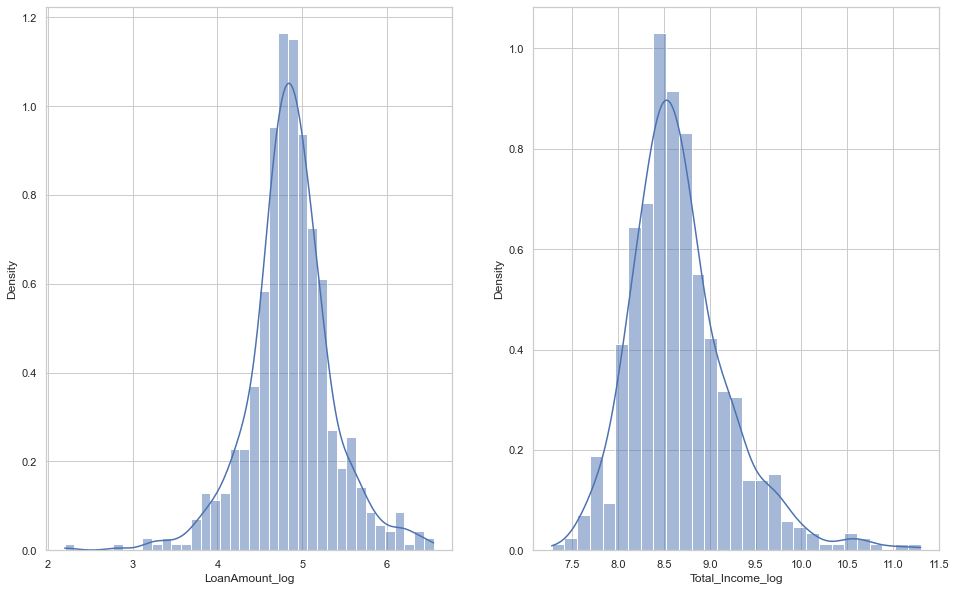

In [227]:
fig, ax = plt.subplots(1, 2,figsize=(16,10))
sns.histplot(data=data ,x="LoanAmount_log", kde=True, stat='density',ax=ax[0])
sns.histplot(data=data ,x="Total_Income_log", kde=True, stat='density',ax=ax[1])

In [279]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'ApplicantIncome_log', 'LoanAmount_log',
       'Total_Income_log', 'CoapplicantIncome_log'],
      dtype='object')

In [280]:
df = data.drop(axis=1, columns=['Loan_ID','ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
    'Loan_Amount_Term','Total_Income','CoapplicantIncome_log'])

In [281]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,ApplicantIncome_log,LoanAmount_log,Total_Income_log
0,Male,No,0,Graduate,No,1.0,Urban,Y,8.674026,4.986426,8.674026
1,Male,Yes,1,Graduate,No,1.0,Rural,N,8.430109,4.852030,8.714568
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,8.006368,4.189655,8.006368
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,7.856707,4.787492,8.505323
4,Male,No,0,Graduate,No,1.0,Urban,Y,8.699515,4.948760,8.699515


In [282]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    object 
 1   Married              614 non-null    object 
 2   Dependents           614 non-null    object 
 3   Education            614 non-null    object 
 4   Self_Employed        614 non-null    object 
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    object 
 7   Loan_Status          614 non-null    object 
 8   ApplicantIncome_log  614 non-null    float64
 9   LoanAmount_log       614 non-null    float64
 10  Total_Income_log     614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


# Handling categorical data

In [283]:
df.Credit_History.value_counts()

1.000000    475
0.000000     89
0.842199     50
Name: Credit_History, dtype: int64

In [284]:
df.Property_Area.value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [285]:
df.Education.value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [286]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Credit_History', 'Property_Area', 'Loan_Status', 'ApplicantIncome_log',
       'LoanAmount_log', 'Total_Income_log'],
      dtype='object')

In [287]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Gender               614 non-null    object 
 1   Married              614 non-null    object 
 2   Dependents           614 non-null    object 
 3   Education            614 non-null    object 
 4   Self_Employed        614 non-null    object 
 5   Credit_History       614 non-null    float64
 6   Property_Area        614 non-null    object 
 7   Loan_Status          614 non-null    object 
 8   ApplicantIncome_log  614 non-null    float64
 9   LoanAmount_log       614 non-null    float64
 10  Total_Income_log     614 non-null    float64
dtypes: float64(4), object(7)
memory usage: 52.9+ KB


In [288]:
d1 = pd.get_dummies(df['Gender'], drop_first= True)
d2 = pd.get_dummies(df['Married'], drop_first= True)
d3 = pd.get_dummies(df['Dependents'], drop_first= True)
d4 = pd.get_dummies(df['Education'], drop_first= True)
d5 = pd.get_dummies(df['Self_Employed'], drop_first= True)
d6 = pd.get_dummies(df['Property_Area'], drop_first= True)

df1 = pd.concat([df, d1, d2, d3, d4, d5, d6], axis = 1)
df=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
df = df.drop(columns=cols, axis=1)

In [289]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Credit_History       614 non-null    float64
 1   Loan_Status          614 non-null    object 
 2   ApplicantIncome_log  614 non-null    float64
 3   LoanAmount_log       614 non-null    float64
 4   Total_Income_log     614 non-null    float64
 5   Male                 614 non-null    uint8  
 6   Yes                  614 non-null    uint8  
 7   1                    614 non-null    uint8  
 8   2                    614 non-null    uint8  
 9   3+                   614 non-null    uint8  
 10  Not Graduate         614 non-null    uint8  
 11  Yes                  614 non-null    uint8  
 12  Semiurban            614 non-null    uint8  
 13  Urban                614 non-null    uint8  
dtypes: float64(4), object(1), uint8(9)
memory usage: 29.5+ KB


In [290]:
df.describe()

,Credit_History,ApplicantIncome_log,LoanAmount_log,Total_Income_log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.842199,8.341213,4.862066,8.669414,0.817590,0.653094,0.166124,0.164495,0.083062,0.218241,0.133550,0.379479,0.328990
std,0.349681,0.645263,0.496575,0.545102,0.386497,0.476373,0.372495,0.371027,0.276201,0.413389,0.340446,0.485653,0.470229
min,0.000000,5.010635,2.197225,7.273786,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,7.964677,4.607658,8.334712,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,8.246040,4.859812,8.597205,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,8.664750,5.104426,8.925549,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,11.302204,6.551080,11.302204,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [291]:
df.head()

,Credit_History,Loan_Status,ApplicantIncome_log,LoanAmount_log,Total_Income_log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.0,Y,8.674026,4.986426,8.674026,1,0,0,0,0,0,0,0,1
1,1.0,N,8.430109,4.852030,8.714568,1,1,1,0,0,0,0,0,0
2,1.0,Y,8.006368,4.189655,8.006368,1,1,0,0,0,0,1,0,1
3,1.0,Y,7.856707,4.787492,8.505323,1,1,0,0,0,1,0,0,1
4,1.0,Y,8.699515,4.948760,8.699515,1,0,0,0,0,0,0,0,1


# Test dataset

In [292]:
test = pd.read_csv("Loan_Data/test.csv")
# filling numerical missing data
test['LoanAmount']=test['LoanAmount'].fillna(test['LoanAmount'].mean())
test['Loan_Amount_Term']=test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mean())
test['Credit_History']=test['Credit_History'].fillna(test['Credit_History'].mean())

# filling categorical missing data
test['Gender']=test['Gender'].fillna(test['Gender'].mode()[0])
test['Married']=test['Married'].fillna(test['Married'].mode()[0])
test['Dependents']=test['Dependents'].fillna(test['Dependents'].mode()[0])
test['Self_Employed']=test['Self_Employed'].fillna(test['Self_Employed'].mode()[0])

test['Total_income'] = test['ApplicantIncome']+test['CoapplicantIncome']

# apply log transformation to the attribute
test['ApplicantIncomeLog'] = np.log(test['ApplicantIncome'])

test['LoanAmountLog'] = np.log(test['LoanAmount'])

test['Loan_Amount_Term_Log'] = np.log(test['Loan_Amount_Term'])

test['Total_Income_Log'] = np.log(test['Total_income'])

cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_income", 'Loan_ID']
test = test.drop(columns=cols, axis=1)

t1 = pd.get_dummies(test['Gender'], drop_first= True)
t2 = pd.get_dummies(test['Married'], drop_first= True)
t3 = pd.get_dummies(test['Dependents'], drop_first= True)
t4 = pd.get_dummies(test['Education'], drop_first= True)
t5 = pd.get_dummies(test['Self_Employed'], drop_first= True)
t6 = pd.get_dummies(test['Property_Area'], drop_first= True)



df1 = pd.concat([test, t1, t2, t3, t4, t5, t6], axis = 1)
test=df1

cols = ['Gender', 'Married', "Dependents", "Education", "Self_Employed", 'Property_Area']
test = test.drop(columns=cols, axis=1)

C:\Users\Kuber Kumar\Anaconda3\envs\Loan_Prediction\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [293]:
test.head()

,Credit_History,ApplicantIncomeLog,LoanAmountLog,Loan_Amount_Term_Log,Total_Income_Log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
0,1.000000,8.651724,4.700480,5.886104,8.651724,1,1,0,0,0,0,0,0,1
1,1.000000,8.031385,4.836282,5.886104,8.428581,1,1,1,0,0,0,0,0,1
2,1.000000,8.517193,5.337538,5.886104,8.824678,1,1,0,1,0,0,0,0,1
3,0.825444,7.757906,4.605170,5.886104,8.494129,1,1,0,1,0,0,0,0,1
4,1.000000,8.094378,4.356709,5.886104,8.094378,1,0,0,0,0,1,0,0,1


# split datasets

In [294]:
# specify input and output attributes
x = df.drop(columns=['Loan_Status'], axis=1)
y = df['Loan_Status']

In [295]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

# Model traing and testing

In [308]:
# randomforest classifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [297]:

print("Accuracy is", model.score(x_test, y_test)*100)

Accuracy is 77.92207792207793


In [318]:
import pickle
with open('models/model_rf.pkl', 'wb') as f:
    pickle.dump(model, f)

In [322]:
# decision tree classifier
from sklearn.tree import DecisionTreeClassifier
model2 = DecisionTreeClassifier()
model2.fit(x_train, y_train)
print("Accuracy is", model2.score(x_test, y_test)*100)

Accuracy is 70.77922077922078


In [323]:
# logistic regression
from sklearn.linear_model import LogisticRegression
model3 = LogisticRegression()
model3.fit(x_train, y_train)
print("Accuracy is", model3.score(x_test, y_test)*100)

Accuracy is 77.27272727272727


In [324]:
import pickle
with open('models/model_lf.pkl', 'wb') as f:
    pickle.dump(model3, f)

In [325]:
# random forest classifier
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[22, 32],
       [ 3, 97]], dtype=int64)

In [326]:
# import pickle
# with open('models/model_rf.pkl') as f:
#     loaded_model = pickle.load(f)

In [327]:
x_train

,Credit_History,ApplicantIncome_log,LoanAmount_log,Total_Income_log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
92,1.0,8.093462,4.394449,8.535622,1,1,0,1,0,1,0,0,1
304,1.0,8.294050,4.941642,8.779557,1,0,0,0,0,0,0,0,0
68,1.0,8.867850,4.828314,8.867850,1,1,0,0,1,1,1,0,1
15,1.0,8.507143,4.828314,8.507143,1,0,0,0,0,0,0,0,1
211,0.0,8.140316,4.852030,8.451053,1,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,1.0,7.536364,4.574711,8.229511,1,1,0,1,0,1,1,1,0
106,1.0,9.342859,5.416100,9.436918,1,1,0,1,0,0,0,0,1
270,1.0,8.082402,3.401197,8.082402,0,0,0,0,0,0,0,0,1
435,1.0,9.215029,4.986426,9.215029,0,1,0,0,0,0,0,1,0


In [328]:
x_test

,Credit_History,ApplicantIncome_log,LoanAmount_log,Total_Income_log,Male,Yes,1,2,3+,Not Graduate,Yes,Semiurban,Urban
350,1.000000,9.114160,5.429346,9.114160,1,1,0,0,0,0,0,1,0
377,0.842199,8.368693,4.867534,8.368693,1,1,0,0,0,0,0,1,0
163,1.000000,8.334952,5.062595,8.633019,1,1,0,1,0,0,0,0,0
609,1.000000,7.972466,4.262680,7.972466,0,0,0,0,0,0,0,0,0
132,1.000000,7.907652,4.248495,7.907652,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
535,1.000000,7.843849,4.836282,8.432071,1,0,0,0,0,1,0,0,0
468,1.000000,5.347108,4.584967,8.047829,0,1,0,1,0,1,0,1,0
582,1.000000,8.060224,3.583519,8.060224,0,1,0,0,0,0,0,1,0
291,0.000000,8.389360,4.844187,8.389360,1,1,0,1,0,0,0,1,0


In [333]:
model.predict([[1.0,7.2,2.2,7.5,1,1,0,0,1,0,0,0,0]])

array(['Y'], dtype=object)

In [335]:
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 350 to 75
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Credit_History       154 non-null    float64
 1   ApplicantIncome_log  154 non-null    float64
 2   LoanAmount_log       154 non-null    float64
 3   Total_Income_log     154 non-null    float64
 4   Male                 154 non-null    uint8  
 5   Yes                  154 non-null    uint8  
 6   1                    154 non-null    uint8  
 7   2                    154 non-null    uint8  
 8   3+                   154 non-null    uint8  
 9   Not Graduate         154 non-null    uint8  
 10  Yes                  154 non-null    uint8  
 11  Semiurban            154 non-null    uint8  
 12  Urban                154 non-null    uint8  
dtypes: float64(4), uint8(9)
memory usage: 7.4 KB


In [336]:
x_test.columns

Index(['Credit_History', 'ApplicantIncome_log', 'LoanAmount_log',
       'Total_Income_log', 'Male', 'Yes', '1', '2', '3+', 'Not Graduate',
       'Yes', 'Semiurban', 'Urban'],
      dtype='object')